# Telecome Churn Case Study

## Objectives
The main goal of the case study is to build ML models to predict churn. The predictive model that you’re going to build will the following purposes:

- It will be used to predict whether a high-value customer will churn or not, in near future (i.e. churn phase). By knowing this, the company can take action steps such as providing special plans, discounts on recharge etc.

- It will be used to identify important variables that are strong predictors of churn. These variables may also indicate why customers choose to switch to other networks.

- Even though overall accuracy will be your primary evaluation metric, you should also mention other metrics like precision, recall, etc. for the different models that can be used for evaluation purposes based on different business objectives. For example, in this problem statement, one business goal can be to build an ML model that identifies customers who'll definitely churn with more accuracy as compared to the ones who'll not churn. Make sure you mention which metric can be used in such scenarios.

 - Recommend strategies to manage customer churn based on your observations.
 
 
## Approach

- Data Understanding, Preparation, and Pre-Processing :

- Exploratory Data Analysis :

- Feature Engineering and Variable Transformation :

- Model Selection, Model Building, and  Prediction :


# Data understanding

In [6]:
#Code to avoid the warnings
import warnings
warnings.filterwarnings('ignore')

In [7]:
#readind the dataset
telecom_df = pd.read_csv('/kaggle/input/telecom-churn-case-study-hackathon/train.csv')
telecom_df.head()

,id,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,arpu_6,arpu_7,...,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,churn_probability
0,0,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,31.277,87.009,...,0,0,NaN,NaN,NaN,1958,0.0,0.0,0.0,0
1,1,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,0.000,122.787,...,0,0,NaN,1.0,NaN,710,0.0,0.0,0.0,0
2,2,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,60.806,103.176,...,0,0,NaN,NaN,NaN,882,0.0,0.0,0.0,0
3,3,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,156.362,205.260,...,0,0,NaN,NaN,NaN,982,0.0,0.0,0.0,0
4,4,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,240.708,128.191,...,1,0,1.0,1.0,1.0,647,0.0,0.0,0.0,0


In [8]:
telecom_df.info

<bound method DataFrame.info of           id  circle_id  loc_og_t2o_mou  std_og_t2o_mou  loc_ic_t2o_mou  \
0          0        109             0.0             0.0             0.0   
1          1        109             0.0             0.0             0.0   
2          2        109             0.0             0.0             0.0   
3          3        109             0.0             0.0             0.0   
4          4        109             0.0             0.0             0.0   
...      ...        ...             ...             ...             ...   
69994  69994        109             0.0             0.0             0.0   
69995  69995        109             0.0             0.0             0.0   
69996  69996        109             0.0             0.0             0.0   
69997  69997        109             0.0             0.0             0.0   
69998  69998        109             0.0             0.0             0.0   

      last_date_of_month_6 last_date_of_month_7 last_date_of_month_

In [9]:
telecom_df.describe

<bound method NDFrame.describe of           id  circle_id  loc_og_t2o_mou  std_og_t2o_mou  loc_ic_t2o_mou  \
0          0        109             0.0             0.0             0.0   
1          1        109             0.0             0.0             0.0   
2          2        109             0.0             0.0             0.0   
3          3        109             0.0             0.0             0.0   
4          4        109             0.0             0.0             0.0   
...      ...        ...             ...             ...             ...   
69994  69994        109             0.0             0.0             0.0   
69995  69995        109             0.0             0.0             0.0   
69996  69996        109             0.0             0.0             0.0   
69997  69997        109             0.0             0.0             0.0   
69998  69998        109             0.0             0.0             0.0   

      last_date_of_month_6 last_date_of_month_7 last_date_of_mont

In [10]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [11]:
#import all the required libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [12]:
telecom_df.shape

(69999, 172)

In [13]:
telecom_df.head()

,id,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_2g_6,arpu_2g_7,arpu_2g_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,churn_probability
0,0,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,31.277,87.009,7.527,48.58,124.38,1.29,32.24,96.68,2.33,0.00,0.0,0.0,0.00,0.0,0.00,2.23,0.00,0.28,5.29,16.04,2.33,0.00,0.00,0.00,0.00,0.00,0.00,7.53,16.04,2.61,46.34,124.38,1.01,18.75,80.61,0.0,0.00,0.0,0.0,0.0,0.0,0.0,65.09,204.99,1.01,0.0,0.0,0.0,8.20,0.63,0.00,0.38,0.0,0.0,81.21,221.68,3.63,2.43,3.68,7.79,0.83,21.08,16.91,0.00,0.00,0.00,3.26,24.76,24.71,0.00,7.61,0.21,7.46,19.96,14.96,0.0,0.0,0.0,0.0,0.0,0.0,7.46,27.58,15.18,11.84,53.04,40.56,0.0,0.0,0.66,0.0,0.0,0.0,1.11,0.69,0.00,3,2,2,77,65,10,65,65,10,6/22/2014,7/10/2014,8/24/2014,65,65,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.00,0.00,0.0,0.00,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,1958,0.0,0.0,0.0,0
1,1,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,0.000,122.787,42.953,0.00,0.00,0.00,0.00,25.99,30.89,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,22.01,29.79,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.0,0.0,0.0,0.00,30.73,31.66,0.00,0.0,0.0,0.00,30.73,31.66,1.68,19.09,10.53,1.41,18.68,11.09,0.35,1.66,3.40,3.44,39.44,25.03,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,3.44,39.44,25.04,0.0,0.0,0.01,0.0,0.0,0.0,0.00,0.00,0.00,3,4,5,0,145,50,0,145,50,6/12/2014,7/10/2014,8/26/2014,0,0,0,NaN,7/8/2014,NaN,NaN,1.0,NaN,NaN,145.0,NaN,NaN,0.0,NaN,NaN,1.0,NaN,Na

In [14]:
columns_with_onevalue = [(col, telecom_df[col].unique()[0]) for col in telecom_df.columns if telecom_df[col].nunique() == 1]
for col, unique_value in columns_with_onevalue:
    print(f"Column: {col}, Unique Value: {unique_value}")
    #we can drop the columns with only one value as it doesn't helps in the prediction
    telecom_df = telecom_df.drop(columns=[col])

Column: circle_id, Unique Value: 109
Column: loc_og_t2o_mou, Unique Value: 0.0
Column: std_og_t2o_mou, Unique Value: 0.0
Column: loc_ic_t2o_mou, Unique Value: 0.0
Column: last_date_of_month_6, Unique Value: 6/30/2014
Column: last_date_of_month_7, Unique Value: 7/31/2014
Column: last_date_of_month_8, Unique Value: 8/31/2014
Column: std_og_t2c_mou_6, Unique Value: 0.0
Column: std_og_t2c_mou_7, Unique Value: 0.0
Column: std_og_t2c_mou_8, Unique Value: 0.0
Column: std_ic_t2o_mou_6, Unique Value: 0.0
Column: std_ic_t2o_mou_7, Unique Value: 0.0
Column: std_ic_t2o_mou_8, Unique Value: 0.0


In [15]:
telecom_df.shape

(69999, 159)

In [16]:
#Finding the missing values
missing_values = telecom_df.isnull().sum()
missing_percentage = telecom_df.isnull().sum() / len(telecom_df) * 100
print("\nMissing Values:")
print(missing_values)
print("\nMissing Percentage")
print(missing_percentage)


Missing Values:
id                              0
arpu_6                          0
arpu_7                          0
arpu_8                          0
onnet_mou_6                  2768
onnet_mou_7                  2687
onnet_mou_8                  3703
offnet_mou_6                 2768
offnet_mou_7                 2687
offnet_mou_8                 3703
roam_ic_mou_6                2768
roam_ic_mou_7                2687
roam_ic_mou_8                3703
roam_og_mou_6                2768
roam_og_mou_7                2687
roam_og_mou_8                3703
loc_og_t2t_mou_6             2768
loc_og_t2t_mou_7             2687
loc_og_t2t_mou_8             3703
loc_og_t2m_mou_6             2768
loc_og_t2m_mou_7             2687
loc_og_t2m_mou_8             3703
loc_og_t2f_mou_6             2768
loc_og_t2f_mou_7             2687
loc_og_t2f_mou_8             3703
loc_og_t2c_mou_6             2768
loc_og_t2c_mou_7             2687
loc_og_t2c_mou_8             3703
loc_og_mou_6                 27

There is a lot of value missing in some of the columns, we can drop these column as most of the data in this is null and thus it can't help in the predictions. We can set the threshold as 40

In [17]:
threshold = 40  # Set threshold for dropping columns
columns_to_drop = missing_percentage[missing_percentage > threshold].index
telecom_df.drop(columns=columns_to_drop, inplace=True)

In [18]:
telecom_df = telecom_df.dropna()

In [19]:
telecom_df.shape

(61895, 129)

In [20]:
telecom_df.head()

,id,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,churn_probability
0,0,31.277,87.009,7.527,48.58,124.38,1.29,32.24,96.68,2.33,0.00,0.0,0.0,0.00,0.0,0.00,2.23,0.00,0.28,5.29,16.04,2.33,0.00,0.00,0.00,0.00,0.00,0.00,7.53,16.04,2.61,46.34,124.38,1.01,18.75,80.61,0.0,0.00,0.0,0.0,65.09,204.99,1.01,0.0,0.0,0.0,8.20,0.63,0.00,0.38,0.0,0.0,81.21,221.68,3.63,2.43,3.68,7.79,0.83,21.08,16.91,0.00,0.00,0.00,3.26,24.76,24.71,0.00,7.61,0.21,7.46,19.96,14.96,0.0,0.0,0.0,7.46,27.58,15.18,11.84,53.04,40.56,0.0,0.0,0.66,0.0,0.0,0.0,1.11,0.69,0.00,3,2,2,77,65,10,65,65,10,6/22/2014,7/10/2014,8/24/2014,65,65,0,0.0,0.00,0.00,0.0,0.00,0.0,0,0,0,0,0,0,0,0,0,0,0,0,1958,0.0,0.0,0.0,0
1,1,0.000,122.787,42.953,0.00,0.00,0.00,0.00,25.99,30.89,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,22.01,29.79,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.0,0.0,0.00,0.00,0.00,0.0,0.0,0.0,0.00,30.73,31.66,0.00,0.0,0.0,0.00,30.73,31.66,1.68,19.09,10.53,1.41,18.68,11.09,0.35,1.66,3.40,3.44,39.44,25.03,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.00,0.00,0.00,3.44,39.44,25.04,0.0,0.0,0.01,0.0,0.0,0.0,0.00,0.00,0.00,3,4,5,0,145,50,0,145,50,6/12/2014,7/10/2014,8/26/2014,0,0,0,0.0,352.91,0.00,0.0,3.96,0.0,0,0,0,0,0,0,0,1,0,0,0,0,710,0.0,0.0,0.0,0
2,2,60.806,103.176,0.000,0.53,15.93,0.00,53.99,82.05,0.00,0.00,0.0,0.0,0.00,0.0,0.00,0.53,12.98,0.00,24.11,0.00,0.00,0.00,0.00,0.00,2.14,0.00,0.00,24.64,12.98,0.00,0.00,2.94,0.00,28.94,82.05,0.0,0.00,0.0,0.0,28.94,84.99,0.00,0.0,0.0,0.0,2.89,1.38,0.00,0.00,0.0,0.0,56.49,99.36,0.00,4.51,6.16,6.49,89.86,25.18,23.51,0.00,0.00,0.00,94.38,31.34,30.01,11.69,0.00,0.00,18.21,2.48,6.38,0.0,0.0,0.0,29.91,2.48,6.38,124.29,33.83,36.64,0.0,0.0,0.00,0.0,0.0,0.0,0.00,0.00,0.25,2,4,2,70,120,0,70,70,0,6/11/2014,7/22/2014,8/24/2014,70,50,0,0.0,0.00,0.00,0.0,0.00,0.0,0,0,0,0,0,0,0,0,0,0,0,0,882,0.0,0.0,0.0,0
3,3,156.362,205.260,111.095,7.26,16.01,0.00,68.76,78.48,50.23,0.00,0.0,0.0,0.00,0.0,1.63,6.99,3.94,0.00,37.91,44.89,23.63,0.00,0.00,0.00,0.00,0.00,8.03,44.91,48.84,23.63,0.26,12.06,0.00,15.33,25.93,4.6,0.56,0.0,0.0,16.16,37.99,4.60,0.0,0.0,0.0,14.95,9.13,25.61,0.00,0.0,0.0,76.03,95.98,53.84,24.98,4.84,23.88,53.99,44.23,57.14,7.23,0.81,0.00,86.21,49.8

In [21]:
date_cols = ['date_of_last_rech_6', 'date_of_last_rech_7', 'date_of_last_rech_8']
days_since_cols = ['days_since_last_rech_6', 'days_since_last_rech_7', 'days_since_last_rech_8']

# Convert date columns to datetime and calculate days since reference date in one step
for date_col, days_since_col in zip(date_cols, days_since_cols):
    telecom_df[date_col] = pd.to_datetime(telecom_df[date_col])
    reference_date = telecom_df[date_col].min()
    telecom_df[days_since_col] = (telecom_df[date_col] - reference_date).dt.days

# Calculate correlation between 'days_since_last_rech' and 'churn_probability'
correlations = {days_since_col: telecom_df[days_since_col].corr(telecom_df['churn_probability']) for days_since_col in days_since_cols}

for col, corr in correlations.items():
    print(f"Correlation between {col} and churn probability: {corr}")

Correlation between days_since_last_rech_6 and churn probability: 0.016895974698106487
Correlation between days_since_last_rech_7 and churn probability: -0.017567353932971617
Correlation between days_since_last_rech_8 and churn probability: -0.0778028069328892


From this it seems that the correlation between the last date of recharge and churn probability is too low so we can just drop it

In [22]:
telecom_df = telecom_df.drop(columns=date_cols)
telecom_df = telecom_df.drop(columns=days_since_cols)

In [23]:
telecom_df.dtypes

id                      int64
arpu_6                float64
arpu_7                float64
arpu_8                float64
onnet_mou_6           float64
onnet_mou_7           float64
onnet_mou_8           float64
offnet_mou_6          float64
offnet_mou_7          float64
offnet_mou_8          float64
roam_ic_mou_6         float64
roam_ic_mou_7         float64
roam_ic_mou_8         float64
roam_og_mou_6         float64
roam_og_mou_7         float64
roam_og_mou_8         float64
loc_og_t2t_mou_6      float64
loc_og_t2t_mou_7      float64
loc_og_t2t_mou_8      float64
loc_og_t2m_mou_6      float64
loc_og_t2m_mou_7      float64
loc_og_t2m_mou_8      float64
loc_og_t2f_mou_6      float64
loc_og_t2f_mou_7      float64
loc_og_t2f_mou_8      float64
loc_og_t2c_mou_6      float64
loc_og_t2c_mou_7      float64
loc_og_t2c_mou_8      float64
loc_og_mou_6          float64
loc_og_mou_7          float64
loc_og_mou_8          float64
std_og_t2t_mou_6      float64
std_og_t2t_mou_7      float64
std_og_t2t

#### as the dataset contains the data of three months we can combine the three moths columns and form one column as the sum

In [24]:
# column_prefixes = set(col.rsplit('_', 1)[0] for col in telecom_df.columns if col.endswith(('6', '7', '8')))
# # Sum the columns for each prefix across the months 6, 7, and 8
# for prefix in column_prefixes:
#     telecom_df[f'{prefix}_total'] = telecom_df[[f'{prefix}_6', f'{prefix}_7', f'{prefix}_8']].sum(axis=1)
#     telecom_df = telecom_df.drop(columns=[f'{prefix}_6', f'{prefix}_7', f'{prefix}_8'])

In [25]:
telecom_df.head(5)

,id,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,churn_probability
0,0,31.277,87.009,7.527,48.58,124.38,1.29,32.24,96.68,2.33,0.00,0.0,0.0,0.00,0.0,0.00,2.23,0.00,0.28,5.29,16.04,2.33,0.00,0.00,0.00,0.00,0.00,0.00,7.53,16.04,2.61,46.34,124.38,1.01,18.75,80.61,0.0,0.00,0.0,0.0,65.09,204.99,1.01,0.0,0.0,0.0,8.20,0.63,0.00,0.38,0.0,0.0,81.21,221.68,3.63,2.43,3.68,7.79,0.83,21.08,16.91,0.00,0.00,0.00,3.26,24.76,24.71,0.00,7.61,0.21,7.46,19.96,14.96,0.0,0.0,0.0,7.46,27.58,15.18,11.84,53.04,40.56,0.0,0.0,0.66,0.0,0.0,0.0,1.11,0.69,0.00,3,2,2,77,65,10,65,65,10,65,65,0,0.0,0.00,0.00,0.0,0.00,0.0,0,0,0,0,0,0,0,0,0,0,0,0,1958,0.0,0.0,0.0,0
1,1,0.000,122.787,42.953,0.00,0.00,0.00,0.00,25.99,30.89,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,22.01,29.79,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.0,0.0,0.00,0.00,0.00,0.0,0.0,0.0,0.00,30.73,31.66,0.00,0.0,0.0,0.00,30.73,31.66,1.68,19.09,10.53,1.41,18.68,11.09,0.35,1.66,3.40,3.44,39.44,25.03,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.00,0.00,0.00,3.44,39.44,25.04,0.0,0.0,0.01,0.0,0.0,0.0,0.00,0.00,0.00,3,4,5,0,145,50,0,145,50,0,0,0,0.0,352.91,0.00,0.0,3.96,0.0,0,0,0,0,0,0,0,1,0,0,0,0,710,0.0,0.0,0.0,0
2,2,60.806,103.176,0.000,0.53,15.93,0.00,53.99,82.05,0.00,0.00,0.0,0.0,0.00,0.0,0.00,0.53,12.98,0.00,24.11,0.00,0.00,0.00,0.00,0.00,2.14,0.00,0.00,24.64,12.98,0.00,0.00,2.94,0.00,28.94,82.05,0.0,0.00,0.0,0.0,28.94,84.99,0.00,0.0,0.0,0.0,2.89,1.38,0.00,0.00,0.0,0.0,56.49,99.36,0.00,4.51,6.16,6.49,89.86,25.18,23.51,0.00,0.00,0.00,94.38,31.34,30.01,11.69,0.00,0.00,18.21,2.48,6.38,0.0,0.0,0.0,29.91,2.48,6.38,124.29,33.83,36.64,0.0,0.0,0.00,0.0,0.0,0.0,0.00,0.00,0.25,2,4,2,70,120,0,70,70,0,70,50,0,0.0,0.00,0.00,0.0,0.00,0.0,0,0,0,0,0,0,0,0,0,0,0,0,882,0.0,0.0,0.0,0
3,3,156.362,205.260,111.095,7.26,16.01,0.00,68.76,78.48,50.23,0.00,0.0,0.0,0.00,0.0,1.63,6.99,3.94,0.00,37.91,44.89,23.63,0.00,0.00,0.00,0.00,0.00,8.03,44.91,48.84,23.63,0.26,12.06,0.00,15.33,25.93,4.6,0.56,0.0,0.0,16.16,37.99,4.60,0.0,0.0,0.0,14.95,9.13,25.61,0.00,0.0,0.0,76.03,95.98,53.84,24.98,4.84,23.88,53.99,44.23,57.14,7.23,0.81,0.00,86.21,49.89,81.03,0.00,0.00,0.00,8.89,0.28,2.81,0.0,0.0,0.0,8.89,0.28,2.81,95.11,50.18,83.84,0.0,0.0,0.00,0.0,0.0,0.0,0.00,0.00,0.00,2,4,3,160,240,130,110,110,5

In [26]:
#Select variable with high corr value as there a lot of feilds we need to skip some of them
corr_matrix = telecom_df.corr()

# Select columns with high correlation with the output variable
threshold = 0.07  # Adjust threshold as needed
relevant_columns = corr_matrix[abs(corr_matrix['churn_probability']) > threshold]['churn_probability'].index

print(relevant_columns)


Index(['arpu_8', 'roam_ic_mou_7', 'roam_ic_mou_8', 'roam_og_mou_7',
       'roam_og_mou_8', 'loc_og_t2m_mou_7', 'loc_og_t2m_mou_8', 'loc_og_mou_7',
       'loc_og_mou_8', 'std_og_t2t_mou_6', 'std_og_t2m_mou_6', 'std_og_mou_6',
       'total_og_mou_8', 'loc_ic_t2m_mou_7', 'loc_ic_t2m_mou_8',
       'loc_ic_mou_6', 'loc_ic_mou_7', 'loc_ic_mou_8', 'total_ic_mou_7',
       'total_ic_mou_8', 'total_rech_num_8', 'total_rech_amt_8',
       'max_rech_amt_8', 'last_day_rch_amt_8', 'aon', 'churn_probability'],
      dtype='object')


In [27]:
# Filter the DataFrame to include only relevant columns
telecom_filtered = telecom_df[relevant_columns]

In [28]:
telecom_filtered.shape

(61895, 26)

In [29]:
telecom_filtered.head()

,arpu_8,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_7,roam_og_mou_8,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2m_mou_6,std_og_mou_6,total_og_mou_8,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,total_ic_mou_7,total_ic_mou_8,total_rech_num_8,total_rech_amt_8,max_rech_amt_8,last_day_rch_amt_8,aon,churn_probability
0,7.527,0.0,0.0,0.0,0.00,16.04,2.33,16.04,2.61,46.34,18.75,65.09,3.63,21.08,16.91,3.26,24.76,24.71,53.04,40.56,2,10,10,0,1958,0
1,42.953,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,31.66,18.68,11.09,3.44,39.44,25.03,39.44,25.04,5,50,50,0,710,0
2,0.000,0.0,0.0,0.0,0.00,0.00,0.00,12.98,0.00,0.00,28.94,28.94,0.00,25.18,23.51,94.38,31.34,30.01,33.83,36.64,2,0,0,0,882,0
3,111.095,0.0,0.0,0.0,1.63,44.89,23.63,48.84,23.63,0.26,15.33,16.16,53.84,44.23,57.14,86.21,49.89,81.03,50.18,83.84,3,130,50,50,982,0
4,101.565,0.0,0.0,0.0,0.00,19.88,4.61,25.94,15.76,0.00,4.35,4.35,15.76,4.33,19.49,21.54,9.36,28.31,9.36,28.31,8,122,30,30,647,0


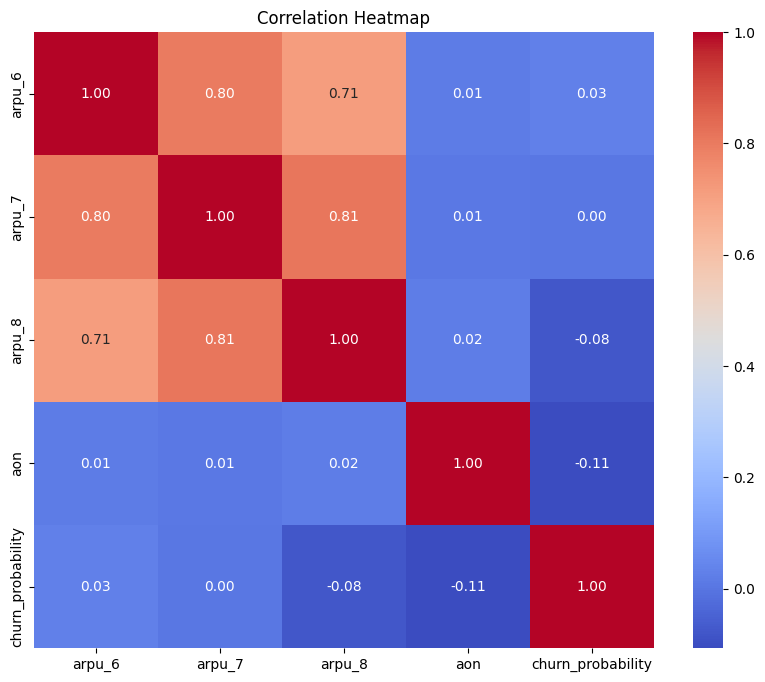

In [30]:
# Correlation heatmap of a subset of features
subset = telecom_df[['arpu_6', 'arpu_7', 'arpu_8', 'aon', 'churn_probability']]
plt.figure(figsize=(10, 8))
sns.heatmap(subset.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

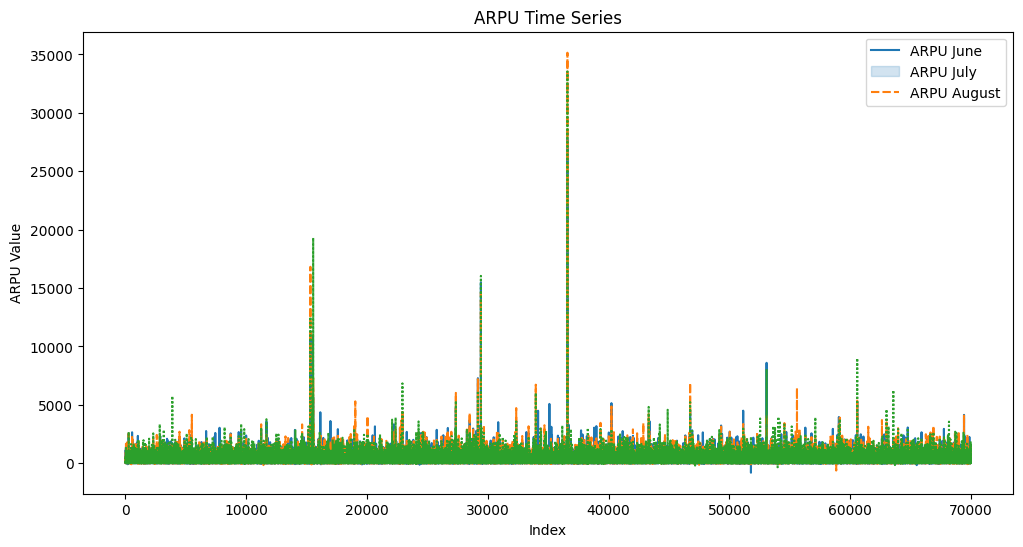

In [31]:
# Time series analysis of the ARPU values across the months
plt.figure(figsize=(12, 6))
sns.lineplot(data=telecom_df[['arpu_6', 'arpu_7', 'arpu_8',]])
plt.title('ARPU Time Series')
plt.xlabel('Index')
plt.ylabel('ARPU Value')
plt.legend(['ARPU June', 'ARPU July', 'ARPU August'])
plt.show()

In [32]:
telecom_filtered.head()

,arpu_8,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_7,roam_og_mou_8,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2m_mou_6,std_og_mou_6,total_og_mou_8,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,total_ic_mou_7,total_ic_mou_8,total_rech_num_8,total_rech_amt_8,max_rech_amt_8,last_day_rch_amt_8,aon,churn_probability
0,7.527,0.0,0.0,0.0,0.00,16.04,2.33,16.04,2.61,46.34,18.75,65.09,3.63,21.08,16.91,3.26,24.76,24.71,53.04,40.56,2,10,10,0,1958,0
1,42.953,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,31.66,18.68,11.09,3.44,39.44,25.03,39.44,25.04,5,50,50,0,710,0
2,0.000,0.0,0.0,0.0,0.00,0.00,0.00,12.98,0.00,0.00,28.94,28.94,0.00,25.18,23.51,94.38,31.34,30.01,33.83,36.64,2,0,0,0,882,0
3,111.095,0.0,0.0,0.0,1.63,44.89,23.63,48.84,23.63,0.26,15.33,16.16,53.84,44.23,57.14,86.21,49.89,81.03,50.18,83.84,3,130,50,50,982,0
4,101.565,0.0,0.0,0.0,0.00,19.88,4.61,25.94,15.76,0.00,4.35,4.35,15.76,4.33,19.49,21.54,9.36,28.31,9.36,28.31,8,122,30,30,647,0


## Exploratory Data Analysis & Preprocessing

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
        68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84,
        85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98]),
 [Text(0, 0, '0.0'),
  Text(1, 0, '6.7'),
  Text(2, 0, '17.544'),
  Text(3, 0, '24.528'),
  Text(4, 0, '31.277'),
  Text(5, 0, '34.919'),
  Text(6, 0, '43.59'),
  Text(7, 0, '46.331'),
  Text(8, 0, '49.24'),
  Text(9, 0, '54.173'),
  Text(10, 0, '60.806'),
  Text(11, 0, '69.158'),
  Text(12, 0, '70.182'),
  Text(13, 0, '70.73'),
  Text(14, 0, '70.91'),
  Text(15, 0, '76.158'),
  Text(16, 0, '80.656'),
  Text(17, 0, '86.193'),
  Text(18, 0, '86.368'),
  Text(19, 0, '86.986'),
  Text(20, 0, '87.754'),
  Text(21, 0, '101.984'),
  Text(22, 0, '104.049'

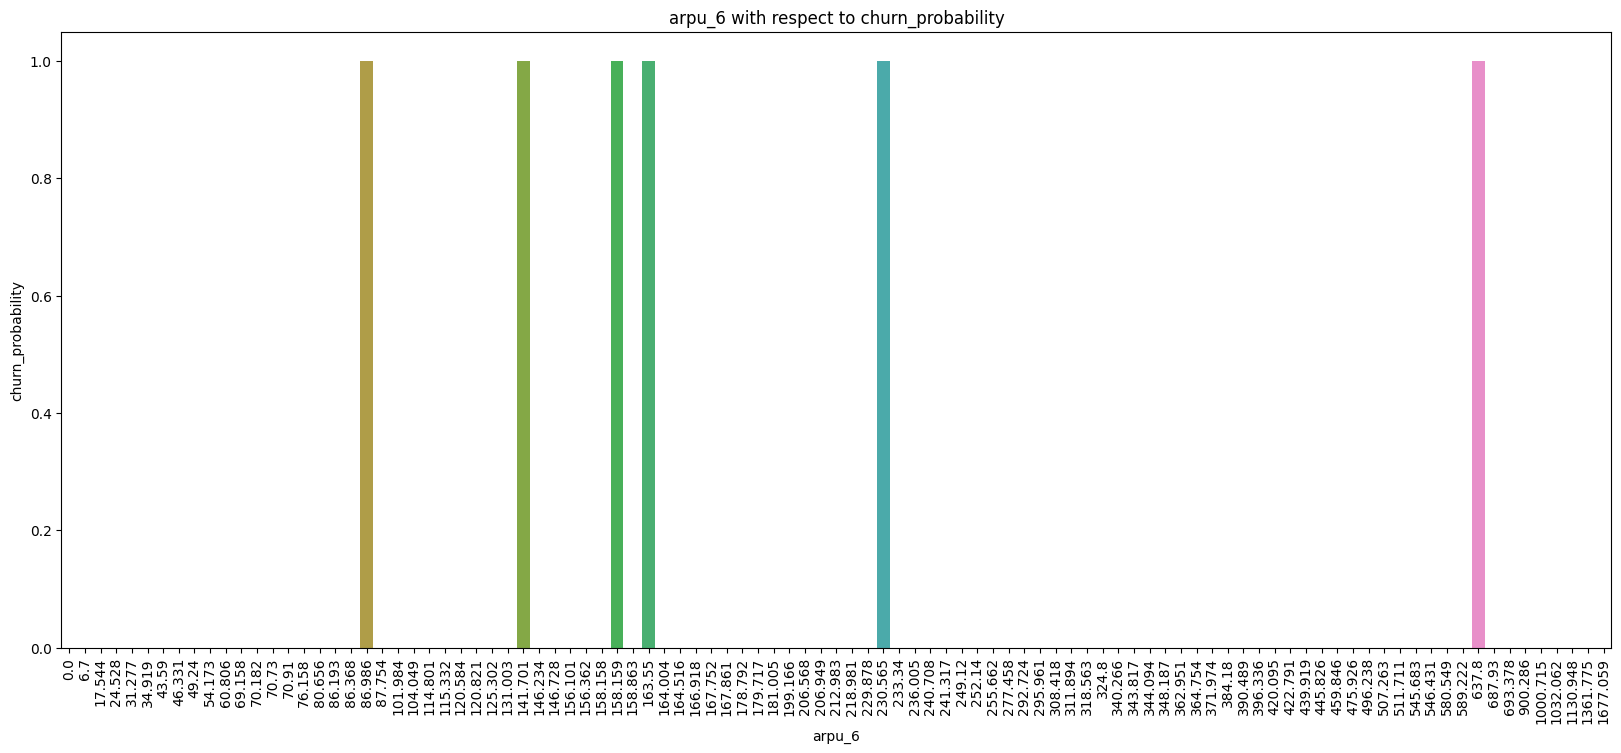

In [33]:
plt.figure(figsize=(20, 8))
sns.barplot(x="arpu_6", y="churn_probability", data= telecom_df.head(100))
plt.title("arpu_6 with respect to churn_probability")
plt.xticks(rotation=90)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
        68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84,
        85, 86, 87, 88, 89, 90, 91, 92, 93]),
 [Text(0, 0, '0.0'),
  Text(1, 0, '0.36'),
  Text(2, 0, '5.53'),
  Text(3, 0, '6.38'),
  Text(4, 0, '8.98'),
  Text(5, 0, '13.96'),
  Text(6, 0, '17.11'),
  Text(7, 0, '17.31'),
  Text(8, 0, '18.06'),
  Text(9, 0, '24.79'),
  Text(10, 0, '25.04'),
  Text(11, 0, '25.66'),
  Text(12, 0, '25.98'),
  Text(13, 0, '26.59'),
  Text(14, 0, '26.99'),
  Text(15, 0, '28.31'),
  Text(16, 0, '28.56'),
  Text(17, 0, '29.31'),
  Text(18, 0, '35.29'),
  Text(19, 0, '36.64'),
  Text(20, 0, '39.64'),
  Text(21, 0, '40.38'),
  Text(22, 0, '40.56'),
  Text(23, 0, '43.03'),
  Text(24, 0, 

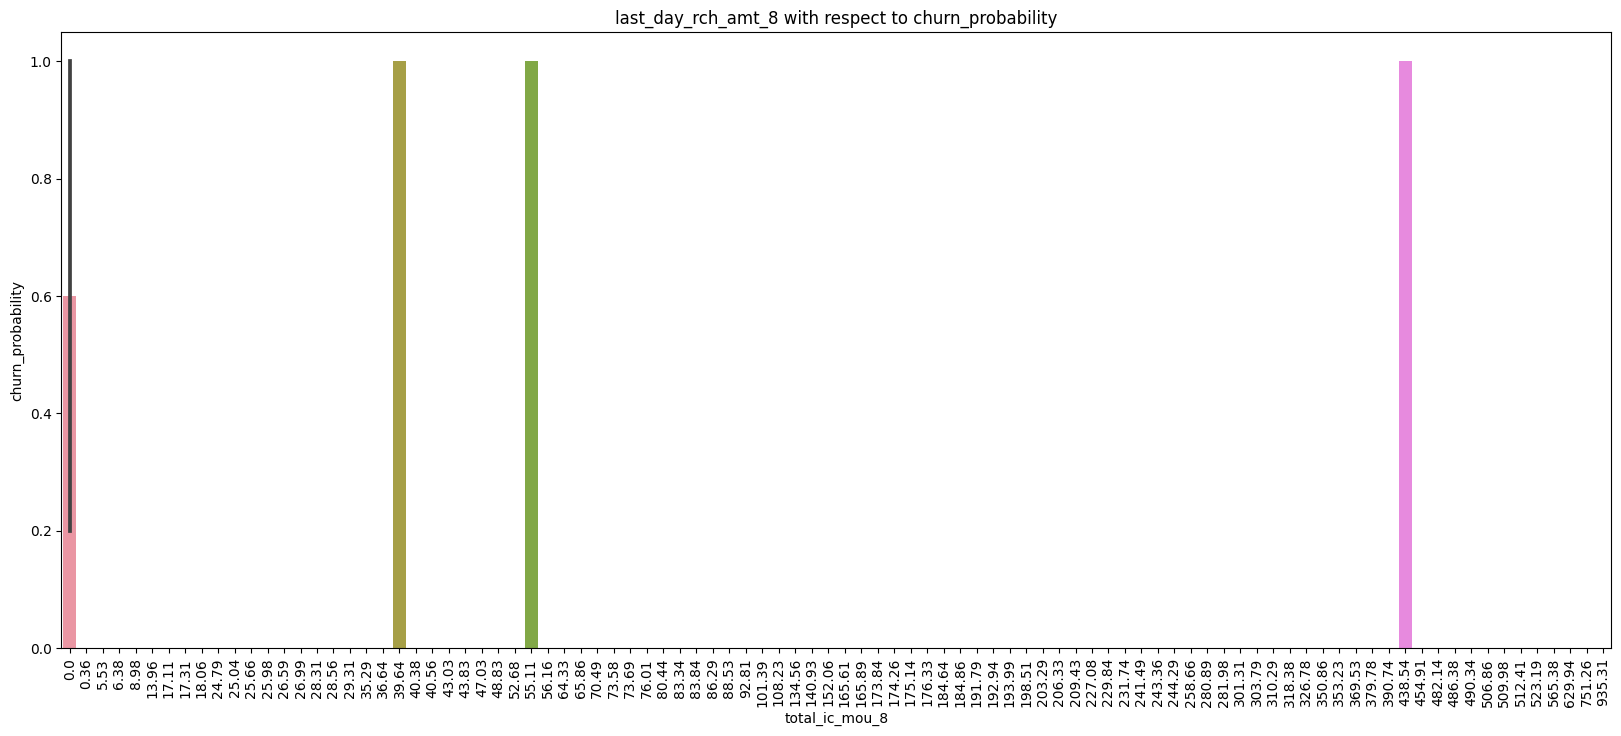

In [34]:
plt.figure(figsize=(20, 8))
sns.barplot(x="total_ic_mou_8", y="churn_probability", data= telecom_filtered.head(100))
plt.title("last_day_rch_amt_8 with respect to churn_probability")
plt.xticks(rotation=90)

#### univariate distributions of each feature

<Axes: >

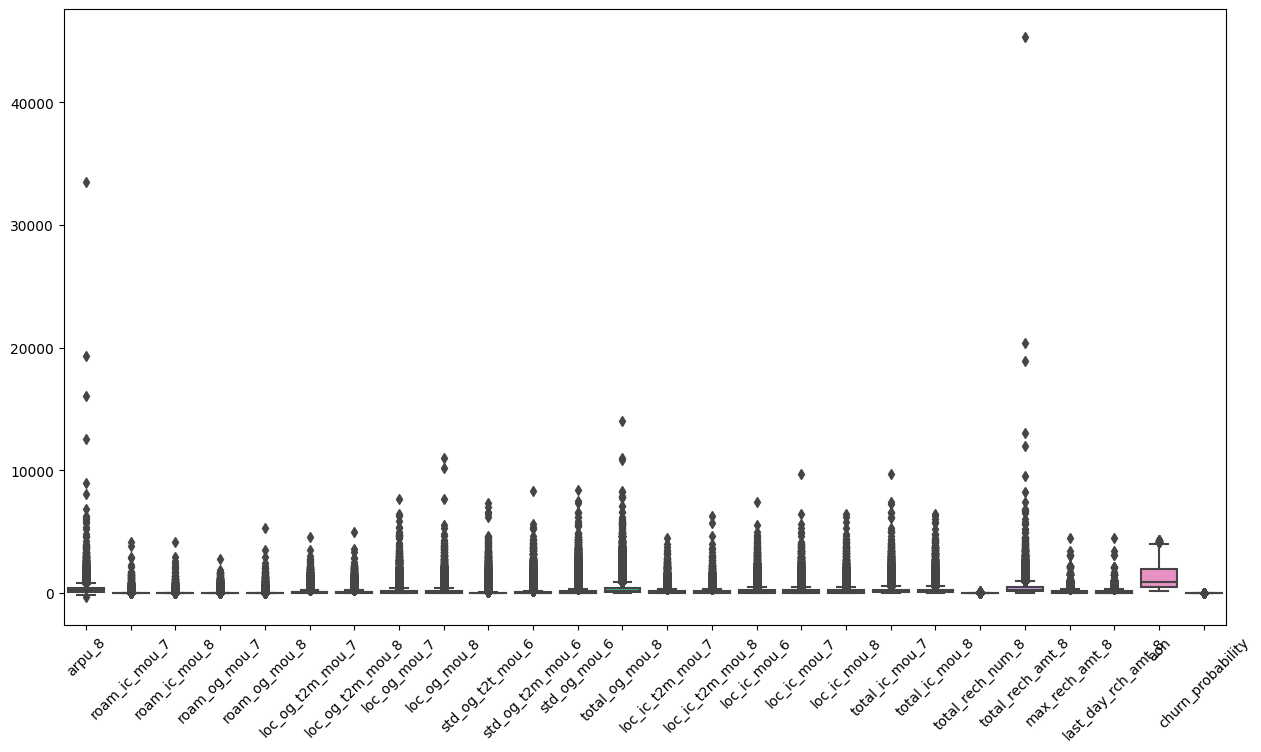

In [35]:
plt.figure(figsize=(15,8))
plt.xticks(rotation=45)
sns.boxplot(data = telecom_filtered)

## Creating X and Y 

In [36]:
# Drop the 'circle_id' column and separate the features and target variable
X = telecom_filtered.drop(columns=['churn_probability'])
y = telecom_filtered['churn_probability']

# Print the shapes of X and yb
X.shape, y.shape

((61895, 25), (61895,))

In [37]:
X.head()

,arpu_8,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_7,roam_og_mou_8,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2m_mou_6,std_og_mou_6,total_og_mou_8,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,total_ic_mou_7,total_ic_mou_8,total_rech_num_8,total_rech_amt_8,max_rech_amt_8,last_day_rch_amt_8,aon
0,7.527,0.0,0.0,0.0,0.00,16.04,2.33,16.04,2.61,46.34,18.75,65.09,3.63,21.08,16.91,3.26,24.76,24.71,53.04,40.56,2,10,10,0,1958
1,42.953,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,31.66,18.68,11.09,3.44,39.44,25.03,39.44,25.04,5,50,50,0,710
2,0.000,0.0,0.0,0.0,0.00,0.00,0.00,12.98,0.00,0.00,28.94,28.94,0.00,25.18,23.51,94.38,31.34,30.01,33.83,36.64,2,0,0,0,882
3,111.095,0.0,0.0,0.0,1.63,44.89,23.63,48.84,23.63,0.26,15.33,16.16,53.84,44.23,57.14,86.21,49.89,81.03,50.18,83.84,3,130,50,50,982
4,101.565,0.0,0.0,0.0,0.00,19.88,4.61,25.94,15.76,0.00,4.35,4.35,15.76,4.33,19.49,21.54,9.36,28.31,9.36,28.31,8,122,30,30,647


In [38]:
y .head()

0    0
1    0
2    0
3    0
4    0
Name: churn_probability, dtype: int64

In [39]:
X.shape

(61895, 25)

In [40]:
X.head()

,arpu_8,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_7,roam_og_mou_8,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2m_mou_6,std_og_mou_6,total_og_mou_8,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,total_ic_mou_7,total_ic_mou_8,total_rech_num_8,total_rech_amt_8,max_rech_amt_8,last_day_rch_amt_8,aon
0,7.527,0.0,0.0,0.0,0.00,16.04,2.33,16.04,2.61,46.34,18.75,65.09,3.63,21.08,16.91,3.26,24.76,24.71,53.04,40.56,2,10,10,0,1958
1,42.953,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,31.66,18.68,11.09,3.44,39.44,25.03,39.44,25.04,5,50,50,0,710
2,0.000,0.0,0.0,0.0,0.00,0.00,0.00,12.98,0.00,0.00,28.94,28.94,0.00,25.18,23.51,94.38,31.34,30.01,33.83,36.64,2,0,0,0,882
3,111.095,0.0,0.0,0.0,1.63,44.89,23.63,48.84,23.63,0.26,15.33,16.16,53.84,44.23,57.14,86.21,49.89,81.03,50.18,83.84,3,130,50,50,982
4,101.565,0.0,0.0,0.0,0.00,19.88,4.61,25.94,15.76,0.00,4.35,4.35,15.76,4.33,19.49,21.54,9.36,28.31,9.36,28.31,8,122,30,30,647


#### Outlier Treatment

In [41]:
#capping the outlier with the highest and the lowest value
def cap_outliers(array, k=5):
    upper_limit = array.mean() + k*array.std()
    lower_limit = array.mean() - k*array.std()
    array[array<lower_limit] = lower_limit
    array[array>upper_limit] = upper_limit
    return array

<Axes: >

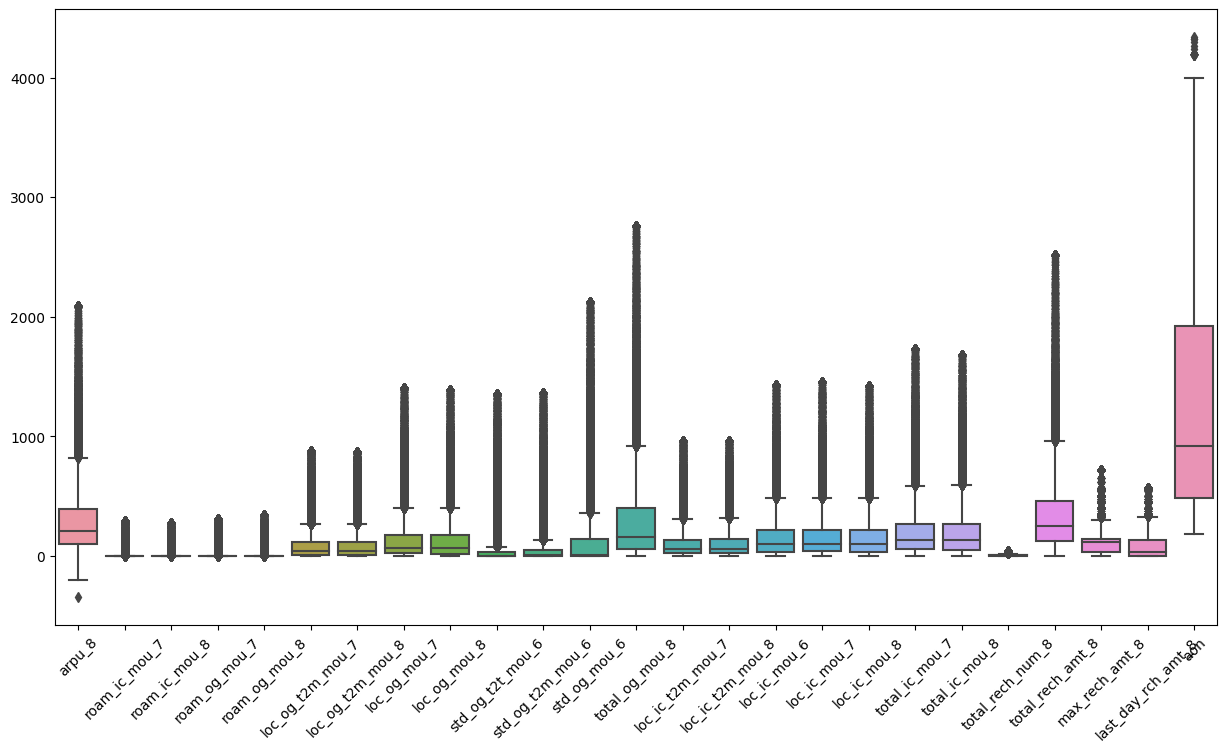

In [42]:
X = X.apply(cap_outliers, axis=0)

plt.figure(figsize=(15,8))
plt.xticks(rotation=45)
sns.boxplot(data = X)

#### Train Test Split

In [43]:
from sklearn.model_selection import train_test_split

In [44]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, test_size=0.2, random_state=100)

### Feature scaling

In [45]:
#importing the scaler libraries
from sklearn.preprocessing import MinMaxScaler, StandardScaler

In [46]:
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X_train)

<Axes: >

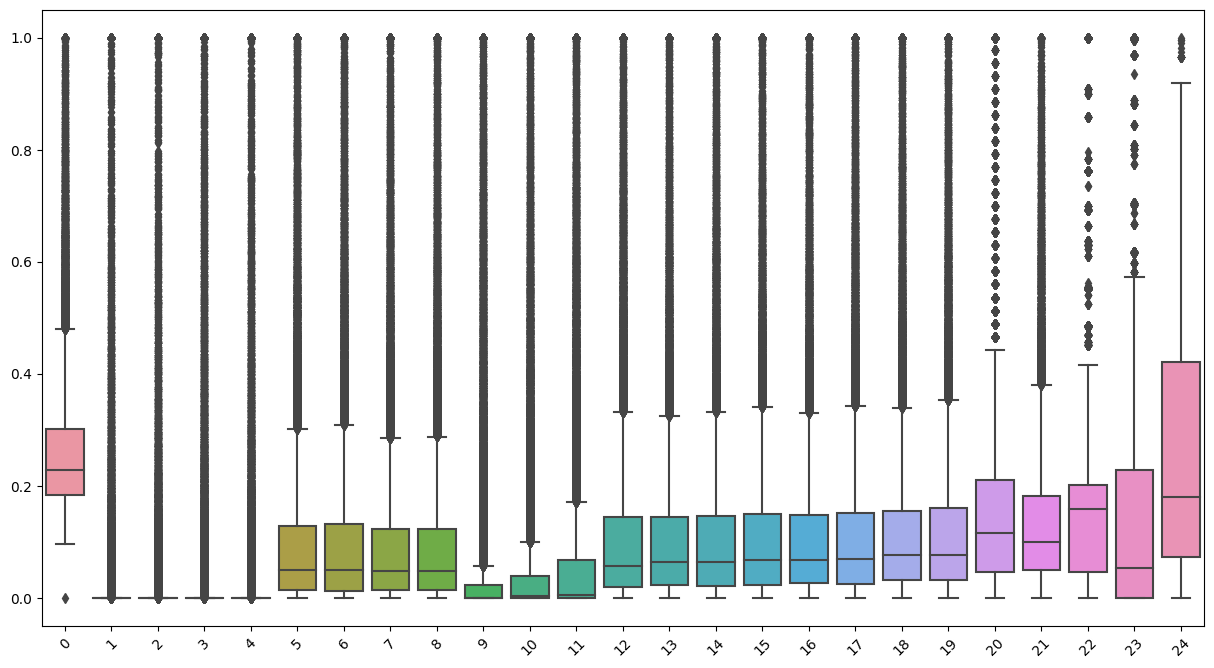

In [47]:
plt.figure(figsize=(15,8))
plt.xticks(rotation=45)
sns.boxplot(data = X_scaled)

<Axes: >

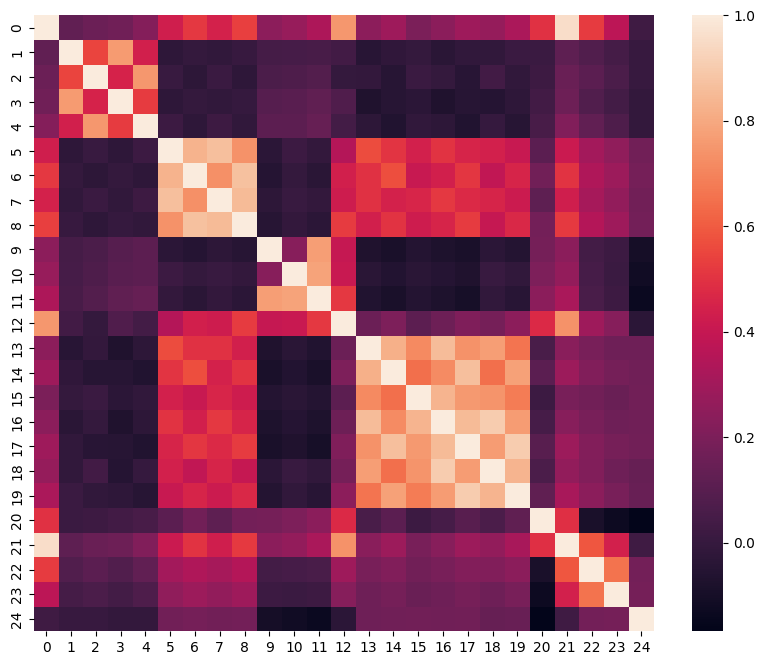

In [48]:
plt.figure(figsize=(10,8))
sns.heatmap(pd.DataFrame(X_scaled).corr())

<Axes: xlabel='churn_probability', ylabel='Count'>

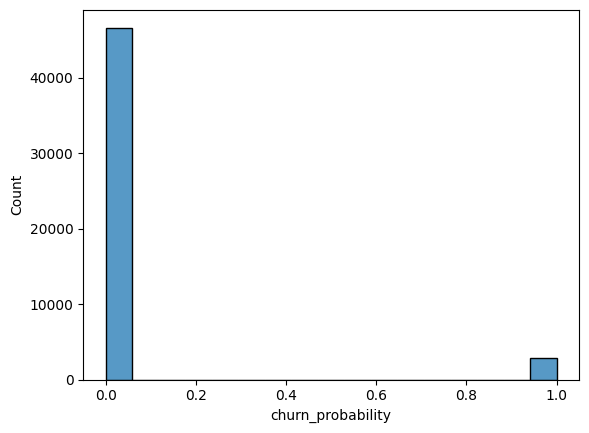

In [49]:
#Distribution for the churn probability
sns.histplot(y_train)

In [50]:
from sklearn.decomposition import PCA,  IncrementalPCA

<Axes: xlabel='PC1', ylabel='PC2'>

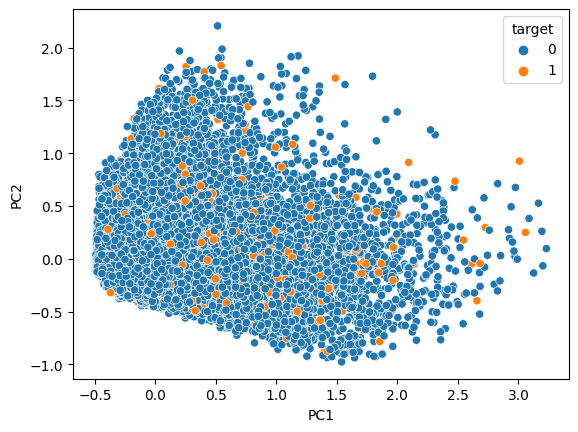

In [51]:
pca =  IncrementalPCA()
pca_components = pca.fit_transform(X_scaled)
pca_df = pd.DataFrame(data=pca_components, columns=[f'PC{i}' for i in range(1, pca_components.shape[1]+1)])

# Concatenate the PCA components DataFrame with the target variable y
pca_df['target'] = y.reset_index(drop=True)

# Plot the scatterplot
sns.scatterplot(x=pca_df['PC1'], y=pca_df['PC2'], hue=pca_df['target'])

In [52]:
#importing linraries for Random Forest
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

In [53]:
lr = LogisticRegression(max_iter=1000, tol=0.001, solver='sag')
lr.fit(pca_components, y_train)

LogisticRegression(max_iter=1000, solver='sag', tol=0.001)

In [54]:
lr.score(pca_components, y_train)

0.9411503352451733

This model have an accuracy of 86.27% percentage in order to increase the model performace we can try it with a different model pipeline

#### Creating a Pipleine for better performance

In [55]:
#importing the SimpleImputer and pipeline
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline

In [56]:
# Define the steps of the pipeline
steps = [
    ('imputation', SimpleImputer(strategy='constant')),  # Handle missing values
    ('scaling', MinMaxScaler()),  # Standardize features
    ('pca', PCA(n_components=0.75)),  # Keep 80% of variance
    ('model', RandomForestClassifier(n_estimators=300, max_depth= 30, random_state=42))  # Random Forest model
]

# Create the pipeline
pipe = Pipeline(steps=steps)

#### GridSearchCV

In [57]:
from sklearn.model_selection import GridSearchCV

In [58]:
# Define the parameter grid for GridSearchCV
param_grid = {
    'model__n_estimators': [100, 200, 300],  # Number of trees in the forest
    'model__max_depth': [10, 20, 30],  # Maximum depth of the tree
    'pca__n_components': [0.95, 0.90, 0.85]  # Percentage of variance explained by the selected components
}


In [59]:
# grid_search = GridSearchCV(pipe, param_grid, cv=2, n_jobs=-1, verbose=2)


# # Fit the pipeline with GridSearchCV on the training data
# grid_search.fit(X_train, y_train)

# # Get the best parameters and best score
# best_params = grid_search.best_params_
# best_score = grid_search.best_score_

# print(f"Best Parameters: {best_params}")
# print(f"Best Score: {best_score}")

In [60]:
# Best model from grid search
# best_model = grid_search.best_estimator_

In [61]:
pipe.fit(X_scaled, y_train)

Pipeline(steps=[('imputation', SimpleImputer(strategy='constant')),
                ('scaling', MinMaxScaler()), ('pca', PCA(n_components=0.75)),
                ('model',
                 RandomForestClassifier(max_depth=30, n_estimators=300,
                                        random_state=42))])

In [62]:
train_score = pipe.score(X_scaled, y_train)
print("Training accuracy:", train_score)

Training accuracy: 0.9999798045076339


In [63]:
test_score = pipe.score(X_test, y_test)
print("Test accuracy:", test_score)

Test accuracy: 0.9418369819856208


In [64]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score, accuracy_score

In [65]:
confusion_matrix(y_train, pipe.predict(X_scaled))

array([[46622,     0],
       [    1,  2893]])

In [66]:
confusion = confusion_matrix(y_test, pipe.predict(X_test))

In [67]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [68]:
# Accuracy
print("Test set Accuracy:", accuracy_score(y_test, pipe.predict(X_test)))

# Sensitivity
print("Test set Sensitivity:",TP / float(TP+FN))

# Specificity
print("Test set Specificity:", TN / float(TN+FP))

Test set Accuracy: 0.9418369819856208
Test set Sensitivity: 0.0
Test set Specificity: 1.0


In [69]:
precision_score(y_test, pipe.predict(X_test))

0.0

### Creating submission file

In [70]:
#reading the unseen test data set
unseen_test_df = pd.read_csv('/kaggle/input/telecom-churn-case-study-hackathon/test.csv')
unseen_test_df.head()

,id,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_2g_6,arpu_2g_7,arpu_2g_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g
0,69999,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,91.882,65.330,64.445,31.78,20.23,23.11,60.16,32.16,34.83,0.00,0.00,0.00,0.00,0.00,0.00,24.88,20.23,21.06,18.13,10.89,8.36,0.00,13.58,0.00,0.0,0.00,0.03,43.01,44.71,29.43,6.90,0.00,2.05,42.03,7.68,26.43,0.0,0.0,0.0,0.0,0.0,0.0,48.93,7.68,28.48,0.0,0.0,0.0,0.00,0.00,0.03,0.0,0.0,0.0,91.94,52.39,57.94,30.33,37.56,21.98,10.21,4.59,9.53,0.26,0.00,0.00,40.81,42.16,31.51,0.00,0.00,0.00,0.36,1.04,4.34,0.0,0.0,0.00,0.0,0.0,0.0,0.36,1.04,4.34,41.73,43.56,36.26,0.54,0.34,0.39,0.00,0.00,0.00,0.0,0.0,0.00,5,5,4,103,90,60,50,30,30,6/21/2014,7/26/2014,8/24/2014,30,30,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,1692,0.00,0.00,0.00
1,70000,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,414.168,515.568,360.868,75.51,41.21,19.84,474.34,621.84,394.94,0.00,0.00,0.00,0.00,0.00,0.00,75.51,41.21,19.84,473.61,598.08,377.26,0.73,0.00,0.00,0.0,0.00,0.00,549.86,639.29,397.11,0.00,0.00,0.00,0.00,23.76,17.68,0.0,0.0,0.0,0.0,0.0,0.0,0.00,23.76,17.68,0.0,0.0,0.8,0.00,0.00,0.00,0.0,0.0,0.0,549.86,663.06,415.59,19.99,26.95,2.61,160.19,122.29,184.81,1.49,0.00,0.00,181.69,149.24,187.43,0.00,0.00,0.00,0.00,12.51,0.00,0.0,0.0,0.00,0.0,0.0,0.0,0.00,12.51,0.00,296.33,339.64,281.66,0.00,0.00,0.00,114.63,177.88,94.23,0.0,0.0,0.00,5,4,5,500,500,500,250,250,250,6/19/2014,7/16/2014,8/24/2014,250,0,0,NaN,NaN,Na

In [71]:
col = X.columns.tolist()
print(col)

['arpu_8', 'roam_ic_mou_7', 'roam_ic_mou_8', 'roam_og_mou_7', 'roam_og_mou_8', 'loc_og_t2m_mou_7', 'loc_og_t2m_mou_8', 'loc_og_mou_7', 'loc_og_mou_8', 'std_og_t2t_mou_6', 'std_og_t2m_mou_6', 'std_og_mou_6', 'total_og_mou_8', 'loc_ic_t2m_mou_7', 'loc_ic_t2m_mou_8', 'loc_ic_mou_6', 'loc_ic_mou_7', 'loc_ic_mou_8', 'total_ic_mou_7', 'total_ic_mou_8', 'total_rech_num_8', 'total_rech_amt_8', 'max_rech_amt_8', 'last_day_rch_amt_8', 'aon']


In [72]:
submission_data = unseen_test_df.set_index('id')[col]
submission_data.shape

(30000, 25)

In [73]:
unseen_test_df['churn_probability'] = pipe.predict(submission_data)
output = unseen_test_df[['id','churn_probability']]
output.head()

,id,churn_probability
0,69999,0
1,70000,0
2,70001,0
3,70002,0
4,70003,0


In [74]:
output.to_csv('submission_pca_rf_5.csv',index=False)